In [1]:
# Our standard imports :)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { font-size:16px !important; }</style>"))
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=False)

In [133]:
# load the data
data = np.genfromtxt("sunspots_fft/all_fft.csv",delimiter=',')
data = np.transpose(data)



print(data.shape)
N_new = int(26475/5)
data_new = np.zeros([2,N_new])
for i in range (0,N_new):
    data_new[0,i] = i
    data_new[1,i] = np.sum(data[1,i*5:(i+1)*5])

# Bin the data before I do anything enlse 
years = data[0]/365.*5.
spots = np.copy(data[1])


(2, 26479)


In [134]:
#data_m = np.loadtxt("SN_m_tot_V2.0.txt",unpack=True)
#years = np.copy(data_m[2])
#spots = np.copy(data_m[3])

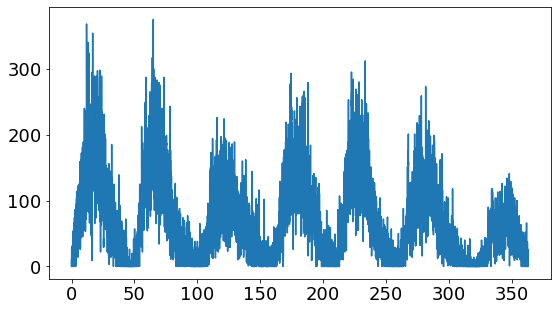

In [135]:
plt.figure(figsize=[9,5])
plt.plot(years,spots)

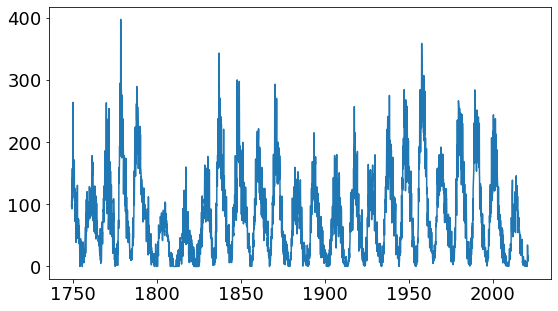

In [126]:
plt.figure(figsize=[9,5])
plt.plot(years,spots)

In [127]:
%%time
# Now let's do that fourier transform:

transformed = np.fft.fft(spots)


# This brings us our new coordinate:
freq = np.fft.fftfreq(len(years))
freq /= (years[1]-years[0])#/2/np.pi

freq = np.fft.fftshift(freq)
transformed = np.fft.fftshift(transformed)


Wall time: 1 ms


In [128]:
transformed_absolute = np.abs(transformed)

(0.05, 1.0)

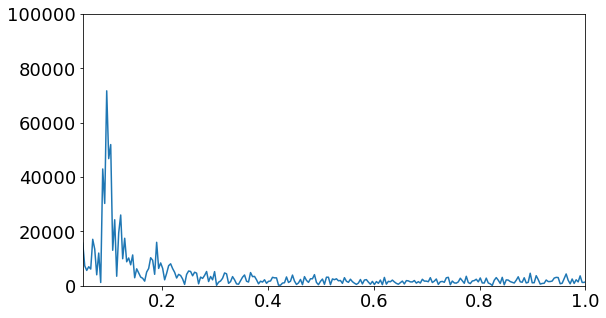

In [131]:
plt.figure(figsize=[9,5])
plt.plot(freq,transformed_absolute)
plt.ylim([0,1E5])
plt.xlim([0.05,1.0])

(1.0, 6.0)

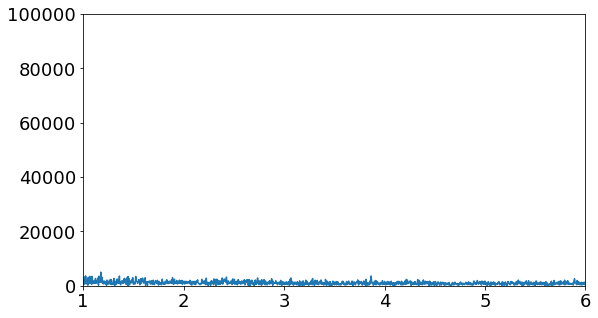

In [132]:
plt.figure(figsize=[9,5])
plt.plot(freq,transformed_absolute)
plt.ylim([0,1E5])
plt.xlim([1.0,6.0])

In [96]:
# Peak is around 13 ? 
# This means 13/year, how much days is that? 

print (365/13)

28.076923076923077


(1.0, 50000.0)

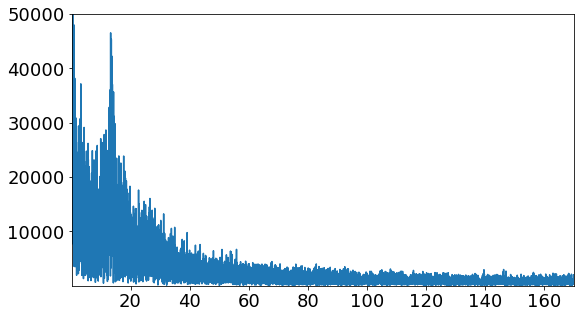

In [101]:
plt.figure(figsize=[9,5])
plt.plot(freq,transformed_absolute)
plt.xlim([0.1,170])
plt.ylim([1,5E4])